In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

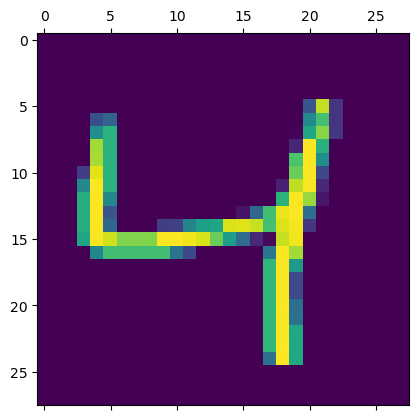

In [7]:
plt.matshow(X_train[2])

In [8]:
y_train[2]

4

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [11]:
X_test_flattened.shape

(10000, 784)

In [12]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


2023-11-01 18:12:39.345270: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 1ms/step - loss: 0.4703 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 2s 965us/step - loss: 0.3039 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.2833 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 1s 798us/step - loss: 0.2727 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 2s 802us/step - loss: 0.2664 - accuracy: 0.9262


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 607us/step - loss: 0.2673 - accuracy: 0.9250


[0.2673211693763733, 0.925000011920929]

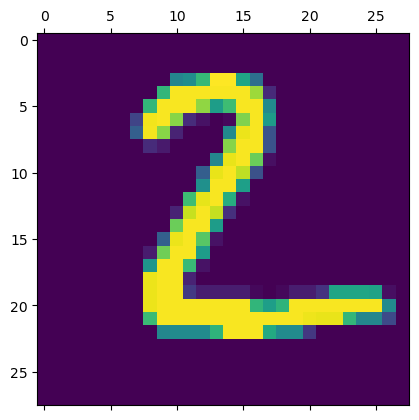

In [15]:
plt.matshow(X_test[1])

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 498us/step


array([6.3360852e-01, 5.9743691e-03, 9.9970418e-01, 3.4591350e-01,
       4.8860982e-10, 8.8735962e-01, 8.4409958e-01, 1.0871344e-12,
       1.5305400e-01, 2.8129621e-09], dtype=float32)

In [17]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [18]:
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    0,    2,    0,    4,    2,    2,    2,    0],
       [   0, 1117,    2,    2,    0,    1,    4,    2,    7,    0],
       [   9,    9,  933,   13,    7,    2,   10,   11,   35,    3],
       [   5,    0,   23,  915,    0,   21,    2,   14,   24,    6],
       [   3,    1,    5,    1,  908,    0,    9,    6,   10,   39],
       [  11,    3,    7,   37,    8,  757,   10,   10,   43,    6],
       [  15,    3,    8,    1,    7,   16,  904,    2,    2,    0],
       [   2,    5,   21,    6,    3,    0,    0,  963,    2,   26],
       [   7,    9,    7,   20,    9,   20,    8,   14,  876,    4],
       [  11,    7,    1,   10,   25,    5,    0,   33,    8,  909]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

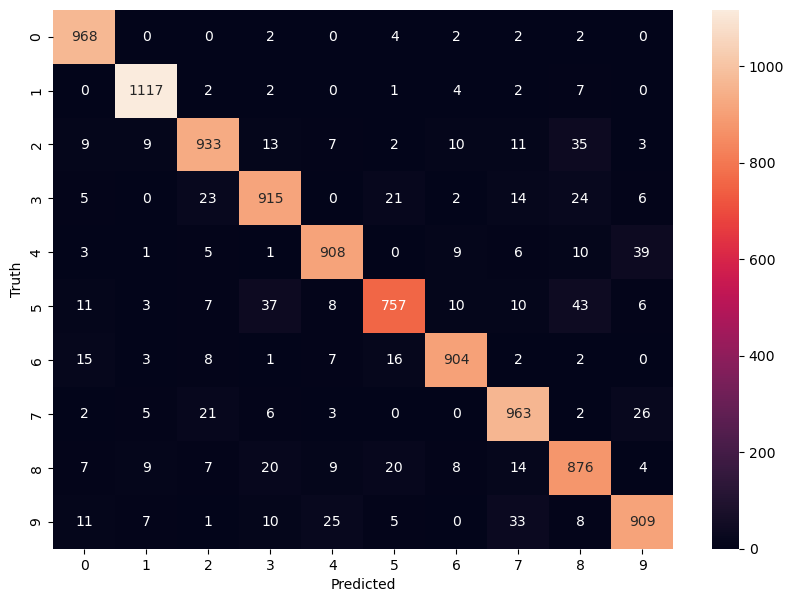

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1239 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0869 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0665 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0519 - accuracy: 0.9841


In [21]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0804 - accuracy: 0.9762


[0.0804431214928627, 0.9761999845504761]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

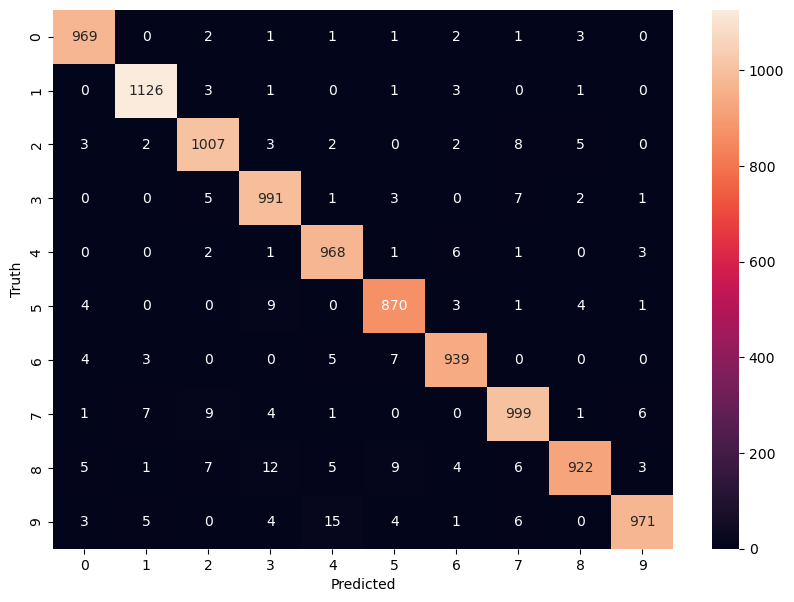

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels= [np.argmax(i) for i in y_predicted]
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2786 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1263 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0887 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0659 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0520 - accuracy: 0.9840
